# License Status Predict

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
df = pd.read_csv('data_file.csv')
df.head()

,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,ADDRESS,CITY,STATE,ZIP CODE,...,LICENSE TERM START DATE,LICENSE TERM EXPIRATION DATE,LICENSE APPROVED FOR ISSUANCE,DATE ISSUED,LICENSE STATUS CHANGE DATE,SSA,LATITUDE,LONGITUDE,LOCATION,LICENSE STATUS
0,35342-20020816,1256593,32811,1,CARMEN CAHUE,CLAUDIA'S BRIDAL SHOP,2625 S CENTRAL PARK AVE 1,CHICAGO,IL,60623.0,...,2002-08-16T00:00:00,2003-08-15T00:00:00,2002-08-21T00:00:00,2006-04-11T00:00:00,NaN,25.0,41.843613,-87.714618,"{'latitude': '41.843612879431845', 'longitude'...",AAI
1,1358463-20051116,1639294,262311,29,"ISLA TROPICAL, INC.",ISLA TROPICAL,2825 W MONTROSE AVE,CHICAGO,IL,60618,...,2005-11-16T00:00:00,2006-11-15T00:00:00,2006-04-05T00:00:00,2006-06-12T00:00:00,2006-06-15T00:00:00,60.0,41.961132,-87.699626,"{'latitude': '41.96113244107215', 'longitude':...",AAC
2,1980233-20090722,1980233,345008,1,DJS REMODELING,"DJS REMODELING, INC.",1605 CLAVEY RD 1,HIGHLAND,IL,60035,...,2009-07-22T00:00:00,2011-07-15T00:00:00,2009-07-22T00:00:00,2009-07-22T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI
3,1476582-20040211,1476582,273121,1,ALL-BRY CONSTRUCTION CO.,ALL-BRY CONSTRUCTION CO.,8 NORTH TRAIL,LEMONT,IL,60439,...,2004-02-11T00:00:00,2005-02-15T00:00:00,2004-02-10T00:00:00,2004-02-11T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI
4,1141408-20080516,1896750,213785,1,MCDONOUGH MECHANICAL SERVICE,MCDONOUGH MECHANICAL SERVICE,4081 JOSEPH DR,WAUKEGAN,IL,60087,...,2008-05-16T00:00:00,2010-05-15T00:00:00,2008-06-04T00:00:00,2008-06-05T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI


In [3]:
df.shape

(85895, 32)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85895 entries, 0 to 85894
Data columns (total 32 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID                                 85895 non-null  object 
 1   LICENSE ID                         85895 non-null  int64  
 2   ACCOUNT NUMBER                     85895 non-null  int64  
 3   SITE NUMBER                        85895 non-null  int64  
 4   LEGAL NAME                         85895 non-null  object 
 5   DOING BUSINESS AS NAME             85894 non-null  object 
 6   ADDRESS                            85895 non-null  object 
 7   CITY                               85895 non-null  object 
 8   STATE                              85895 non-null  object 
 9   ZIP CODE                           85864 non-null  object 
 10  WARD                               36194 non-null  float64
 11  PRECINCT                           29194 non-null  flo

In [5]:
df.describe()

,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,WARD,PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE NUMBER,SSA,LATITUDE,LONGITUDE
count,8.589500e+04,85895.000000,85895.000000,36194.000000,29194.000000,31883.000000,85895.000000,8.589400e+04,9449.000000,38649.000000,38649.000000
mean,1.751303e+06,196695.421701,2.556028,28.528927,54.632973,13.529812,1111.736620,1.228151e+06,29.152080,41.880952,-87.681165
std,3.358780e+05,126819.343760,8.655706,13.921710,163.174955,7.275874,250.020872,7.431487e+05,17.419898,0.079617,0.056248
min,3.079300e+04,10.000000,1.000000,1.000000,1.000000,1.000000,1002.000000,1.290000e+02,1.000000,41.644694,-87.915285
25%,1.469024e+06,54615.000000,1.000000,17.000000,12.000000,8.000000,1010.000000,8.710900e+04,17.000000,41.834312,-87.719150
50%,1.778754e+06,248313.000000,1.000000,30.000000,26.000000,14.000000,1010.000000,1.442202e+06,28.000000,41.892679,-87.673321
75%,2.067578e+06,300243.500000,2.000000,42.000000,41.000000,19.000000,1011.000000,1.816581e+06,40.000000,41.938624,-87.639509
max,2.456551e+06,397444.000000,417.000000,50.000000,999.000000,181.000000,8340.000000,2.391410e+06,69.000000,42.022660,-87.525872


In [6]:
null_df = df.isnull().sum()/len(df)*100
to_drop = null_df[null_df > 50].index.tolist()
to_drop

['WARD',
 'PRECINCT',
 'WARD PRECINCT',
 'POLICE DISTRICT',
 'APPLICATION CREATED DATE',
 'LICENSE STATUS CHANGE DATE',
 'SSA',
 'LATITUDE',
 'LONGITUDE',
 'LOCATION']

In [7]:
df = df.drop(to_drop, axis = 1)

In [8]:
df = df.drop(['LEGAL NAME', 'DOING BUSINESS AS NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIP CODE'], axis = 1)

In [9]:
df = df.drop(['LICENSE ID', 'ACCOUNT NUMBER', 'LICENSE NUMBER'], axis = 1)

In [10]:
df_cat = df.select_dtypes(include = object)
df_num = df.select_dtypes(include = np.number)

In [11]:
# Target Column Distribution
df['LICENSE STATUS'].value_counts(normalize = True)*100

AAI    64.497351
AAC    35.159206
REV     0.337622
REA     0.003493
INQ     0.002328
Name: LICENSE STATUS, dtype: float64

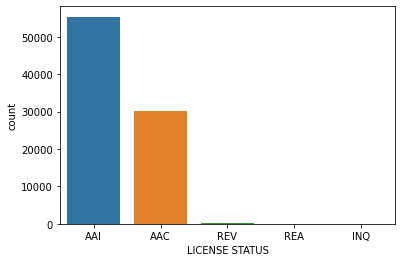

In [12]:
sns.countplot(df['LICENSE STATUS'])
plt.show()

In [13]:
df.head()

,ID,SITE NUMBER,LICENSE CODE,LICENSE DESCRIPTION,APPLICATION TYPE,APPLICATION REQUIREMENTS COMPLETE,PAYMENT DATE,CONDITIONAL APPROVAL,LICENSE TERM START DATE,LICENSE TERM EXPIRATION DATE,LICENSE APPROVED FOR ISSUANCE,DATE ISSUED,LICENSE STATUS
0,35342-20020816,1,1010,Limited Business License,RENEW,2002-06-28T00:00:00,2002-08-21T00:00:00,N,2002-08-16T00:00:00,2003-08-15T00:00:00,2002-08-21T00:00:00,2006-04-11T00:00:00,AAI
1,1358463-20051116,29,1315,Mobile Food Dispenser,RENEW,2005-09-22T00:00:00,2005-11-03T00:00:00,N,2005-11-16T00:00:00,2006-11-15T00:00:00,2006-04-05T00:00:00,2006-06-12T00:00:00,AAC
2,1980233-20090722,1,1011,Home Repair,ISSUE,2009-07-22T00:00:00,2009-07-22T00:00:00,N,2009-07-22T00:00:00,2011-07-15T00:00:00,2009-07-22T00:00:00,2009-07-22T00:00:00,AAI
3,1476582-20040211,1,1010,Limited Business License,ISSUE,2004-02-10T00:00:00,2004-02-10T00:00:00,N,2004-02-11T00:00:00,2005-02-15T00:00:00,2004-02-10T00:00:00,2004-02-11T00:00:00,AAI
4,1141408-20080516,1,1010,Limited Business License,RENEW,2008-03-24T00:00:00,2008-06-04T00:00:00,N,2008-05-16T00:00:00,2010-05-15T00:00:00,2008-06-04T00:00:00,2008-06-05T00:00:00,AAI


In [14]:
def new_feat(dist):

    if dist == 'Limited Business License':
        return 'Limited Business License'
    if dist == 'Home Repair':
        return 'Home Repair'
    else:
        return 'Others'

df['LICENSE DESCRIPTION'] = df['LICENSE DESCRIPTION'].map(new_feat)

def new_feat_1(dist):

    if dist == 1010:
        return '1010'
    if dist == 1011:
        return '1011'
    else:
        return 'Others'

df['LICENSE CODE'] = df['LICENSE CODE'].map(new_feat_1)

def new_feat_2(dist):

    if dist == 1:
        return '1'
    if dist == 2:
        return '2'
    if dist == 3:
        return '3'
    else:
        return 'Others'

df['SITE NUMBER'] = df['SITE NUMBER'].map(new_feat_2)

In [15]:
df['APPLICATION REQUIREMENTS COMPLETE'] = df['APPLICATION REQUIREMENTS COMPLETE'].str[0:4]
df['PAYMENT DATE'] = df['PAYMENT DATE'].str[0:4]
df['CONDITIONAL APPROVAL'] = df['CONDITIONAL APPROVAL'].str[0:4]
df['LICENSE TERM START DATE'] = df['LICENSE TERM START DATE'].str[0:4]
df['LICENSE TERM EXPIRATION DATE'] = df['LICENSE TERM EXPIRATION DATE'].str[0:4]
df['LICENSE APPROVED FOR ISSUANCE'] = df['LICENSE APPROVED FOR ISSUANCE'].str[0:4]
df['DATE ISSUED'] = df['DATE ISSUED'].str[0:4]

In [16]:
df.isnull().sum()/len(df)*100

ID                                   0.000000
SITE NUMBER                          0.000000
LICENSE CODE                         0.000000
LICENSE DESCRIPTION                  0.000000
APPLICATION TYPE                     0.000000
APPLICATION REQUIREMENTS COMPLETE    0.249141
PAYMENT DATE                         1.500669
CONDITIONAL APPROVAL                 0.000000
LICENSE TERM START DATE              0.265440
LICENSE TERM EXPIRATION DATE         0.020956
LICENSE APPROVED FOR ISSUANCE        7.903836
DATE ISSUED                          0.000000
LICENSE STATUS                       0.000000
dtype: float64

In [17]:
# removing null values
df = df.dropna()

In [18]:
df.isnull().sum()/len(df)*100
# Null values have been removed

ID                                   0.0
SITE NUMBER                          0.0
LICENSE CODE                         0.0
LICENSE DESCRIPTION                  0.0
APPLICATION TYPE                     0.0
APPLICATION REQUIREMENTS COMPLETE    0.0
PAYMENT DATE                         0.0
CONDITIONAL APPROVAL                 0.0
LICENSE TERM START DATE              0.0
LICENSE TERM EXPIRATION DATE         0.0
LICENSE APPROVED FOR ISSUANCE        0.0
DATE ISSUED                          0.0
LICENSE STATUS                       0.0
dtype: float64

In [19]:
df_to_encode = df[['SITE NUMBER', 'LICENSE CODE', 'LICENSE DESCRIPTION', 'APPLICATION TYPE', 'CONDITIONAL APPROVAL']]
df_not_to_encode = df[['APPLICATION REQUIREMENTS COMPLETE', 'PAYMENT DATE', 'LICENSE TERM START DATE', 'LICENSE TERM EXPIRATION DATE', 
                      'LICENSE APPROVED FOR ISSUANCE', 'DATE ISSUED']]

In [20]:
df['APPLICATION REQUIREMENTS COMPLETE'].value_counts().index.sort_values()

Index(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016'],
      dtype='object')

In [21]:
df['PAYMENT DATE'].value_counts().index.sort_values()

Index(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016'],
      dtype='object')

In [22]:
df['LICENSE TERM START DATE'].value_counts().index.sort_values()

Index(['1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016'],
      dtype='object')

In [23]:
df['LICENSE TERM EXPIRATION DATE'].value_counts().index.sort_values()

Index(['1901', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018'],
      dtype='object')

In [24]:
df['LICENSE APPROVED FOR ISSUANCE'].value_counts().index.sort_values()

Index(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016'],
      dtype='object')

In [25]:
df['DATE ISSUED'].value_counts().index.sort_values()

Index(['2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016'],
      dtype='object')

In [26]:
df_to_encode = pd.get_dummies(df_to_encode, drop_first = True)
X = pd.concat([df_to_encode, df_not_to_encode], axis = 1)
y = df['LICENSE STATUS']

In [27]:
y.value_counts(normalize = True)*100
# Our target variable is having 4 classes out of which 2 are in very less number.
# We can consider dropping them and consider the 2 classes which form a majority of the proportion i.e. classes - AAI, and AAC

AAI    64.753910
AAC    34.882505
REV     0.359758
REA     0.003827
Name: LICENSE STATUS, dtype: float64

In [28]:
to_drop_index = y[(y == 'REV')|(y == 'REA')].index.tolist()
y = y.drop(to_drop_index)

In [29]:
X = X.drop(to_drop_index)

In [30]:
y = pd.get_dummies(y, drop_first = True)

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(54670, 18)
(23431, 18)
(54670, 1)
(23431, 1)


In [32]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

              precision    recall  f1-score   support

           0       0.74      0.65      0.69      8120
           1       0.83      0.88      0.85     15311

    accuracy                           0.80     23431
   macro avg       0.78      0.77      0.77     23431
weighted avg       0.80      0.80      0.80     23431



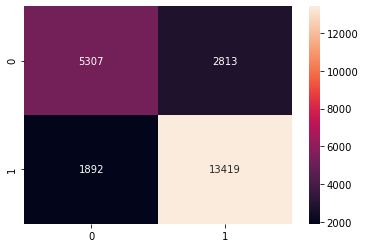

In [33]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt_model = dt.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = 'd')
plt.show()

              precision    recall  f1-score   support

           0       0.68      0.75      0.71      8120
           1       0.86      0.82      0.84     15311

    accuracy                           0.79     23431
   macro avg       0.77      0.78      0.77     23431
weighted avg       0.80      0.79      0.79     23431



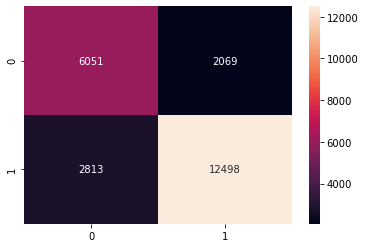

In [34]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(class_weight = 'balanced')
rf_model = rf.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = 'd')
plt.show()

              precision    recall  f1-score   support

           0       0.79      0.11      0.19      8120
           1       0.68      0.98      0.80     15311

    accuracy                           0.68     23431
   macro avg       0.73      0.55      0.50     23431
weighted avg       0.72      0.68      0.59     23431



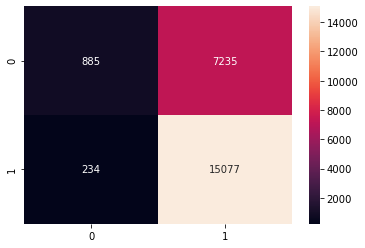

In [35]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = 'd')
plt.show()

              precision    recall  f1-score   support

           0       0.67      0.61      0.64      8120
           1       0.80      0.84      0.82     15311

    accuracy                           0.76     23431
   macro avg       0.74      0.73      0.73     23431
weighted avg       0.76      0.76      0.76     23431



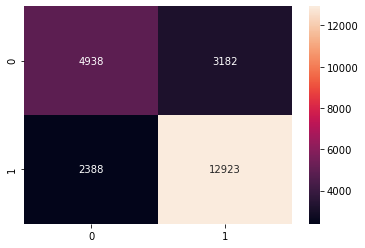

In [36]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada_model = ada.fit(X_train, y_train)
y_pred = ada_model.predict(X_test)
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = 'd')
plt.show()

              precision    recall  f1-score   support

           0       0.74      0.62      0.68      8120
           1       0.82      0.89      0.85     15311

    accuracy                           0.80     23431
   macro avg       0.78      0.76      0.76     23431
weighted avg       0.79      0.80      0.79     23431



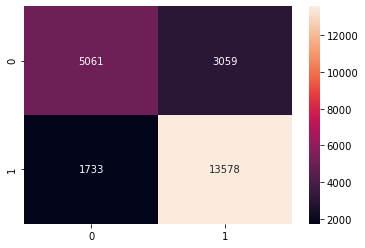

In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = 'd')
plt.show()

              precision    recall  f1-score   support

           0       0.69      0.46      0.55      8120
           1       0.76      0.89      0.82     15311

    accuracy                           0.74     23431
   macro avg       0.72      0.67      0.68     23431
weighted avg       0.73      0.74      0.73     23431



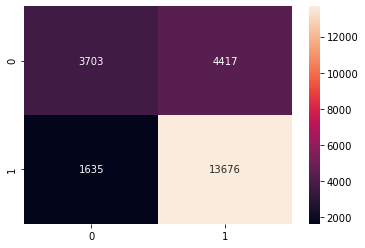

In [38]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg_model = logreg.fit(X_train, y_train)
y_pred = logreg_model.predict(X_test)
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = 'd')
plt.show()

In [39]:
import imblearn
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

              precision    recall  f1-score   support

           0       0.64      0.66      0.65      8120
           1       0.81      0.80      0.81     15311

    accuracy                           0.75     23431
   macro avg       0.73      0.73      0.73     23431
weighted avg       0.75      0.75      0.75     23431



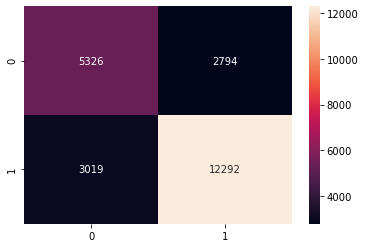

In [40]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada_model = ada.fit(X_resampled, y_resampled)
y_pred = ada_model.predict(X_test)
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = 'd')
plt.show()

In [41]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# instantiating over and under sampler

under = RandomUnderSampler(sampling_strategy=0.70) 
over = RandomOverSampler(sampling_strategy=1)

X_under, y_under = under.fit_resample(X_train, y_train)

X_train_c, y_train_c = over.fit_resample(X_under, y_under)
y_train_c.value_counts()

AAI
0      27461
1      27461
dtype: int64

              precision    recall  f1-score   support

           0       0.64      0.66      0.65      8120
           1       0.81      0.80      0.81     15311

    accuracy                           0.75     23431
   macro avg       0.73      0.73      0.73     23431
weighted avg       0.75      0.75      0.75     23431



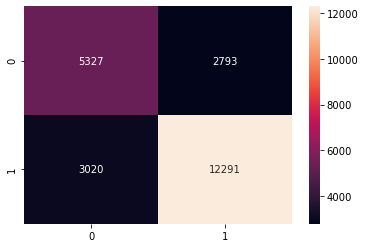

In [42]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada_model = ada.fit(X_train_c, y_train_c)
y_pred = ada_model.predict(X_test)
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = 'd')
plt.show()

In [43]:
X.columns

Index(['SITE NUMBER_2', 'SITE NUMBER_3', 'SITE NUMBER_Others',
       'LICENSE CODE_1011', 'LICENSE CODE_Others',
       'LICENSE DESCRIPTION_Limited Business License',
       'LICENSE DESCRIPTION_Others', 'APPLICATION TYPE_C_EXPA',
       'APPLICATION TYPE_C_LOC', 'APPLICATION TYPE_ISSUE',
       'APPLICATION TYPE_RENEW', 'CONDITIONAL APPROVAL_Y',
       'APPLICATION REQUIREMENTS COMPLETE', 'PAYMENT DATE',
       'LICENSE TERM START DATE', 'LICENSE TERM EXPIRATION DATE',
       'LICENSE APPROVED FOR ISSUANCE', 'DATE ISSUED'],
      dtype='object')

In [44]:
X_cat = X[['APPLICATION REQUIREMENTS COMPLETE', 'PAYMENT DATE',
       'LICENSE TERM START DATE', 'LICENSE TERM EXPIRATION DATE',
       'LICENSE APPROVED FOR ISSUANCE', 'DATE ISSUED']]
X_cat_1 = X[['SITE NUMBER_2', 'SITE NUMBER_3', 'SITE NUMBER_Others',
       'LICENSE CODE_1011', 'LICENSE CODE_Others',
       'LICENSE DESCRIPTION_Limited Business License',
       'LICENSE DESCRIPTION_Others', 'APPLICATION TYPE_C_EXPA',
       'APPLICATION TYPE_C_LOC', 'APPLICATION TYPE_ISSUE',
       'APPLICATION TYPE_RENEW', 'CONDITIONAL APPROVAL_Y']]

In [45]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in X_cat.columns:
    X_cat[i] = le.fit_transform(X_cat[i])

In [46]:
X_new = pd.concat([X_cat, X_cat_1], axis = 1)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.3, random_state = 1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(54670, 18)
(23431, 18)
(54670, 1)
(23431, 1)


[03:09:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[03:09:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.76      0.62      0.68      8120
           1       0.82      0.90      0.86     15311

    accuracy                           0.80     23431
   macro avg       0.79      0.76      0.77     234

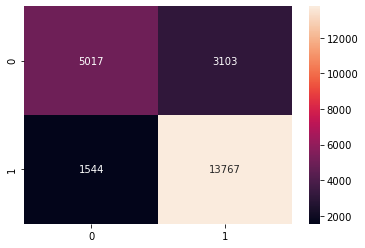

In [48]:
import xgboost
from xgboost import XGBClassifier
xgb = XGBClassifier(class_weight = 'balanced')
xgb_model = xgb.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = 'd')
plt.show()

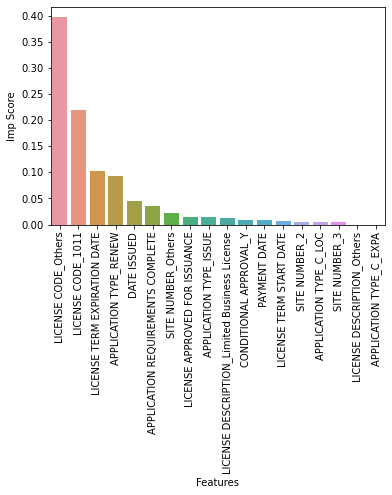

In [49]:
df_imp = pd.DataFrame()
df_imp['Features'] = X_new.columns
df_imp['Imp Score'] = xgb_model.feature_importances_
df_imp = df_imp.sort_values(by = 'Imp Score', ascending = False)
sns.barplot(df_imp['Features'], df_imp['Imp Score'])
plt.xticks(rotation = 90)
plt.show()

In [50]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# instantiating over and under sampler

under = RandomUnderSampler(sampling_strategy=0.70) 
over = RandomOverSampler(sampling_strategy=1)

X_under, y_under = under.fit_resample(X_train, y_train)

X_train_c, y_train_c = over.fit_resample(X_under, y_under)
y_train_c.value_counts()

AAI
0      27461
1      27461
dtype: int64

[03:09:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[03:09:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.68      0.74      0.71      8120
           1       0.86      0.82      0.84     15311

    accuracy                           0.79     23431
   macro avg       0.77      0.78      0.78     234

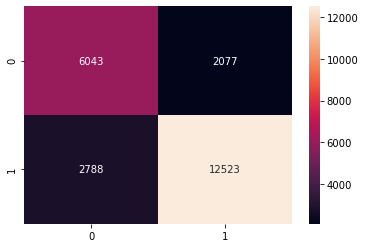

In [51]:
xgb = XGBClassifier(class_weight = 'balanced')
xgb_model = xgb.fit(X_train_c, y_train_c)
y_pred = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = 'd')
plt.show()

In [52]:
import imblearn
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

[03:09:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[03:09:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.69      0.74      0.71      8120
           1       0.86      0.82      0.84     15311

    accuracy                           0.79     23431
   macro avg       0.77      0.78      0.78     234

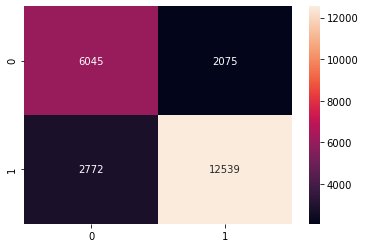

In [53]:
xgb = XGBClassifier(class_weight = 'balanced')
xgb_model = xgb.fit(X_resampled, y_resampled)
y_pred = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = 'd')
plt.show()

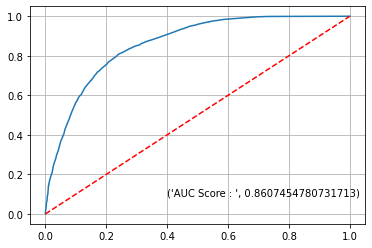

In [54]:
y_prob = xgb_model.predict_proba(X_test)
fpr, tpr, th = roc_curve(y_test, y_prob[:, 1])
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], 'r--')
plt.grid()
plt.text(x = 0.4, y = 0.09, s = ('AUC Score : ', roc_auc_score(y_test, y_prob[:, 1])))
plt.show()

In [55]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test, y_pred)
# 55.27 % of our predictions are correct.

0.552279357577141

In [56]:
# We can consider the above model as our final model.
# f1-score for class 0 = 0.71
# f1-score for class 1 = 0.84